# Credit Risk Resampling Techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# Read the CSV into DataFrame

In [3]:
# Load the data
file_path = Path('./Resources/lending_data.csv')
cr_df = pd.read_csv(file_path)
cr_df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


In [4]:
# Get an understanding of the data in
# descriminating against features and target
# and feature significance
cr_df.groupby(['loan_status']).mean()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
loan_status,,,,,,,
high_risk,18507.800000,10.990529,84027.720000,0.640501,11.649600,2.156400,54027.720000
low_risk,9515.627166,7.169118,48062.314089,0.368549,3.565968,0.333533,18062.314089


# Split the Data into Training and Testing

In [5]:
# Some data needs to be binary
# encoded, specifically 'homeowner'.
from sklearn.preprocessing import LabelEncoder
cr_encoded = pd.get_dummies(cr_df, columns=["homeowner"])
cr_encoded.head()

# Create our features
X = cr_encoded.drop(columns="loan_status")

# Create our target
y = pd.DataFrame(cr_encoded["loan_status"])

In [6]:
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,homeowner_mortgage,homeowner_own,homeowner_rent
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.497472,0.398911,0.103616
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.499997,0.489678,0.304764
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000,0.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000,0.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,1.000000,1.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000,1.000000,1.000000


In [7]:
# Check the balance of our target values
y['loan_status'].value_counts()

low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [8]:
# Import SKLearn Train-Test-Split model from model selections
from sklearn.model_selection import train_test_split

# Create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test= train_test_split(X, 
                                                   y, 
                                                   random_state=1, 
                                                   stratify=y)

# Confirm the size of the training data
# with reference to all data, i.e. 77.5k records/rows
X_train.shape

(58152, 10)

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [9]:
# Import SKLearn StandardScaler from preprocessing
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
cr_data_scaler = StandardScaler()

In [10]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
# Fitting the scaler
X_scaler = cr_data_scaler.fit(X_train)

In [11]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Simple Logistic Regression

In [12]:
# Import SKLearn Logistic Regression Model from linear models
from sklearn.linear_model import LogisticRegression

# Create the model
lr_model = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model to the data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [13]:
# Import SKLearn Balanced Accuracy Score from metrics
from sklearn.metrics import balanced_accuracy_score

# Calculate the balanced accuracy score
y_pred = lr_model.predict(X_test_scaled)
bal_acc = balanced_accuracy_score(y_test, y_pred)

# Neaten up the delivery of the  score
print(f"\nBalanced Accuracy Score: {bal_acc}\n")


Balanced Accuracy Score: 0.9892813049736127



In [14]:
# Imports of SKLearn matrix from metrics
from sklearn.metrics import confusion_matrix

# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[  615,    10],
       [  102, 18657]], dtype=int64)

<AxesSubplot:>

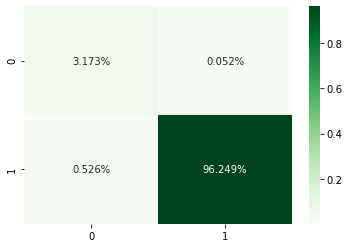

In [15]:
# Now display the confusion matrix a little better :)
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.3%', cmap='Greens')

In [16]:
# Import imbalanced classification report, calculate and and print it
from imblearn.metrics import classification_report_imbalanced
cl_report = classification_report_imbalanced(y_test, y_pred, digits=4)
print(cl_report)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk     0.8577    0.9840    0.9946    0.9165    0.9893    0.9776       625
   low_risk     0.9995    0.9946    0.9840    0.9970    0.9893    0.9797     18759

avg / total     0.9949    0.9942    0.9843    0.9944    0.9893    0.9796     19384



# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

### Naive Random Oversampling

In [17]:
# Import RandomOverSampler from over sampling lib
from imblearn.over_sampling import RandomOverSampler

# Resample the training data with the RandomOversampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# View the count of target classes with Counter
# Print original then compare ...
print("Original (top) vs. Resampled data\n---------------------------------")
print(Counter(y_train["loan_status"]))
Counter(y_resampled["loan_status"])

Original (top) vs. Resampled data
---------------------------------
Counter({'low_risk': 56277, 'high_risk': 1875})


Counter({'low_risk': 56277, 'high_risk': 56277})

In [18]:
# Train the Logistic Regression model using the resampled data
lr_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [19]:
# Calculate the balanced accuracy score
os_y_pred = lr_model.predict(X_test)
os_bal_acc = balanced_accuracy_score(y_test, os_y_pred)
# Prettier
print(f"\nBalanced Accuracy Score: {os_bal_acc}\n")


Balanced Accuracy Score: 0.9947746894823818



In [20]:
# Display the confusion matrix
os_cf_matrix = confusion_matrix(y_test, os_y_pred)
os_cf_matrix

array([[  622,     3],
       [  106, 18653]], dtype=int64)

<AxesSubplot:>

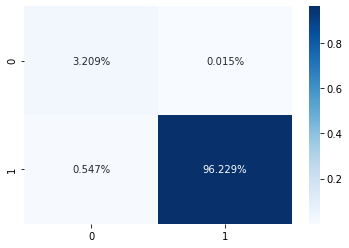

In [21]:
# Prettier
sns.heatmap(os_cf_matrix/np.sum(os_cf_matrix), annot=True, fmt='.3%', cmap='Blues')

In [22]:
# Print the imbalanced classification report
os_cl_report = classification_report_imbalanced(y_test, os_y_pred, digits=5)
print(os_cl_report)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk    0.85440   0.99520   0.99435   0.91944   0.99477   0.98966       625
   low_risk    0.99984   0.99435   0.99520   0.99709   0.99477   0.98949     18759

avg / total    0.99515   0.99438   0.99517   0.99458   0.99477   0.98950     19384



### SMOTE Oversampling

In [23]:
# Import SMOTE from Imbalanced Learn Oversampling lib
from imblearn.over_sampling import SMOTE

# Resample the training data with SMOTE
X_resampled, y_resampled = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(X_train, y_train)

# View the count of target classes with Counter
# Print original then compare ...
print("Original (top) vs. Resampled data\n---------------------------------")
print(Counter(y_train["loan_status"]))
Counter(y_resampled["loan_status"])

Original (top) vs. Resampled data
---------------------------------
Counter({'low_risk': 56277, 'high_risk': 1875})


Counter({'low_risk': 56277, 'high_risk': 56277})

In [24]:
# Train the Logistic Regression model using the resampled data
lr_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [25]:
# Calculated the balanced accuracy score
ste_y_pred = lr_model.predict(X_test)
ste_bal_acc = balanced_accuracy_score(y_test, ste_y_pred)
# Prettier
print(f"\nBalanced Accuracy Score: {ste_bal_acc}\n")


Balanced Accuracy Score: 0.9948279972279972



In [26]:
# Display the confusion matrix
ste_cf_matrix = confusion_matrix(y_test, ste_y_pred)
ste_cf_matrix

array([[  622,     3],
       [  104, 18655]], dtype=int64)

<AxesSubplot:>

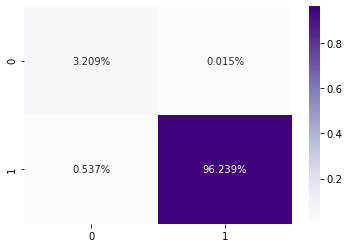

In [27]:
# Prettier Matrix
sns.heatmap(ste_cf_matrix/np.sum(ste_cf_matrix), annot=True, fmt='.3%', cmap='Purples')

In [28]:
# Print the imbalanced classification report
ste_cl_report = classification_report_imbalanced(y_test, ste_y_pred, digits=5)
print(ste_cl_report)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk    0.85675   0.99520   0.99446   0.92080   0.99483   0.98976       625
   low_risk    0.99984   0.99446   0.99520   0.99714   0.99483   0.98961     18759

avg / total    0.99523   0.99448   0.99518   0.99468   0.99483   0.98961     19384



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [29]:
# Import ClusterCentroids resampler from Imbalanced Learn Undersampling lib
from imblearn.under_sampling import ClusterCentroids

# Resample the data using the ClusterCentroids resampler
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)

# View the count of target classes with Counter
# Print original then compare ...
print("Original (top) vs. Resampled data\n---------------------------------")
print(Counter(y_train["loan_status"]))
Counter(y_resampled["loan_status"])

Original (top) vs. Resampled data
---------------------------------
Counter({'low_risk': 56277, 'high_risk': 1875})


Counter({'high_risk': 1875, 'low_risk': 1875})

In [30]:
# Train the Logistic Regression model using the resampled data
lr_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [31]:
# Calculate the balanced accuracy score
cc_y_pred = lr_model.predict(X_test)
cc_bal_acc = balanced_accuracy_score(y_test, cc_y_pred)
# Prettier
print(f"\nBalanced Accuracy Score: {cc_bal_acc}\n")


Balanced Accuracy Score: 0.9828813049736127



In [32]:
# Display the confusion matrix
cc_cf_matrix = confusion_matrix(y_test, cc_y_pred)
cc_cf_matrix

array([[  607,    18],
       [  102, 18657]], dtype=int64)

<AxesSubplot:>

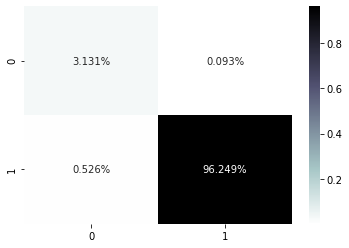

In [33]:
# Prettier Matrix
sns.heatmap(cc_cf_matrix/np.sum(cc_cf_matrix), annot=True, fmt='.3%', cmap='bone_r')

In [34]:
# Print the imbalanced classification report
cc_cl_report = classification_report_imbalanced(y_test, cc_y_pred, digits=4)
print(cc_cl_report)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk     0.8561    0.9712    0.9946    0.9100    0.9828    0.9637       625
   low_risk     0.9990    0.9946    0.9712    0.9968    0.9828    0.9682     18759

avg / total     0.9944    0.9938    0.9720    0.9940    0.9828    0.9680     19384



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [35]:
# Import SMOTEENN from Imbalanced Learn Combination lib
from imblearn.combine import SMOTEENN

# Resample the training data with SMOTEENN
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# View the count of target classes with Counter
# Print original then compare ...
print("Original (top) vs. Resampled data\n---------------------------------")
print(Counter(y_train["loan_status"]))
Counter(y_resampled["loan_status"])

Original (top) vs. Resampled data
---------------------------------
Counter({'low_risk': 56277, 'high_risk': 1875})


Counter({'high_risk': 55538, 'low_risk': 55928})

In [36]:
# Train the Logistic Regression model using the resampled data
lr_model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [37]:
# Calculate the balanced accuracy score
sten_y_pred = lr_model.predict(X_test)
sten_bal_acc = balanced_accuracy_score(y_test, sten_y_pred)
# Prettier
print(f"\nBalanced Accuracy Score: {sten_bal_acc}\n")


Balanced Accuracy Score: 0.994748035609574



In [38]:
# Display the confusion matrix
sten_cf_matrix = confusion_matrix(y_test, sten_y_pred)
sten_cf_matrix

array([[  622,     3],
       [  107, 18652]], dtype=int64)

<AxesSubplot:>

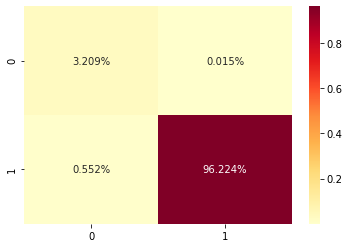

In [39]:
# Prettier Matrix
sns.heatmap(sten_cf_matrix/np.sum(sten_cf_matrix), annot=True, fmt='.3%', cmap='YlOrRd')

In [40]:
# Print the imbalanced classification report
sten_cl_report = classification_report_imbalanced(y_test, sten_y_pred, digits=5)
print(sten_cl_report)

                   pre       rec       spe        f1       geo       iba       sup

  high_risk    0.85322   0.99520   0.99430   0.91876   0.99475   0.98961       625
   low_risk    0.99984   0.99430   0.99520   0.99706   0.99475   0.98943     18759

avg / total    0.99511   0.99433   0.99517   0.99454   0.99475   0.98944     19384



In [42]:
# Print all Balanced Accuracy Scores for easy reference ...
#
print("          All Balanced Accuracy Scores\n---------------------------------------------------")
print(f"         Simple Scaled sampling: {bal_acc}")
print(f"      Naive Random Oversampling: {os_bal_acc}")
print(f"             SMOTE Oversampling: {ste_bal_acc}")
print(f"Cluster Centroids Undersampling: {cc_bal_acc}")
print(f" SMOTE_ENN Combination sampling: {sten_bal_acc}")

          All Balanced Accuracy Scores
---------------------------------------------------
         Simple Scaled sampling: 0.9892813049736127
      Naive Random Oversampling: 0.9947746894823818
             SMOTE Oversampling: 0.9948279972279972
Cluster Centroids Undersampling: 0.9828813049736127
 SMOTE_ENN Combination sampling: 0.994748035609574


# Final Questions

1. Which model had the best balanced accuracy score?

   **Answer:**  
   In answer to the question, the model with the most balanced accuracy was SMOTE with oversampling.  
   
   *Note: Because it is easier to extract just the scores, I've printed them above for easy comparison.*

2. Which model had the best recall score?

   **Answer:**  
   The model with the best recall score is the SMOTE Oversampling model based on the average (and f1-score)!
   
| Resampling model | Avg. f1 | high_risk | low_risk | Avg. Recall | Best
| -: | :-: | :-: | :-: | :-: | :-:
| Simple Scaled sampling | 0.9944 | 0.9840 | 0.9946 | 0.9942
| Naive Random Oversampling | 0.99458 | 0.9952 | 0.9943 | 0.9944
| SMOTE Oversampling | 0.99468 | 0.9952 | 0.9945 | 0.9945 | X
| Cluster Centroids Undersampling | 0.9940 | 0.9712 | 0.9946 | 0.9938
| SMOTE_ENN Combination sampling | 0.99454 | 0.9952 | 0.9943 | 0.9943


3. Which model had the best geometric mean score?

   **Answer:**  
   Similarly, the model with the best geometric mean is the SMOTE Oversampling model, but only just pips naive random sampling!

| Resampling model | Geometric Mean | Best
| -: | :- | :-:
| Simple Scaled sampling | 0.9893
| Naive Random Oversampling | 0.99477
| SMOTE Oversampling | 0.99483 | X
| Cluster Centroids Undersampling | 0.9828
| SMOTE_ENN Combination sampling | 0.99475
